In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data/airline_passengers.csv', index_col='Month',parse_dates=True)

In [3]:
df.index.freq = 'MS'

In [4]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [5]:
train_data = df.iloc[:109] #.loc[:'1960-01-01']
test_data = df.iloc[108:]

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=12).fit()

In [9]:
test_predictions = fitted_model.forecast(36)

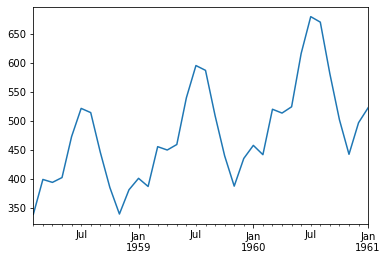

In [12]:
test_predictions.plot()

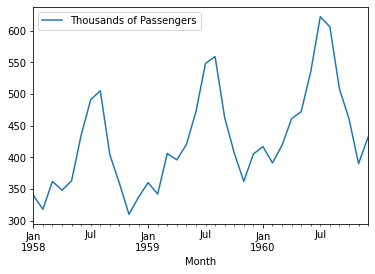

In [13]:
test_data.plot()

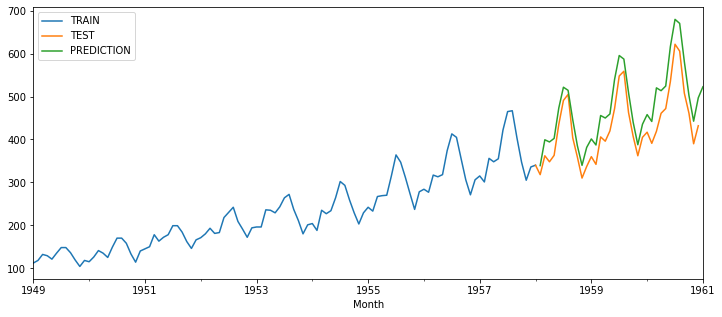

In [15]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION')